<a href="https://colab.research.google.com/github/kit-crowley/stock-forecasting/blob/main/notebooks/01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'stock-forecasting'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 5), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 5.03 KiB | 5.03 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Data for AAPL
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-06-29 00:00:00-04:00 to 2025-06-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1256 non-null   float64
 1   High          1256 non-null   float64
 2   Low           1256 non-null   float64
 3   Close         1256 non-null   float64
 4   Volume        1256 non-null   int64  
 5   Dividends     1256 non-null   float64
 6   Stock Splits  1256 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.5 KB
None
                                Open       High   

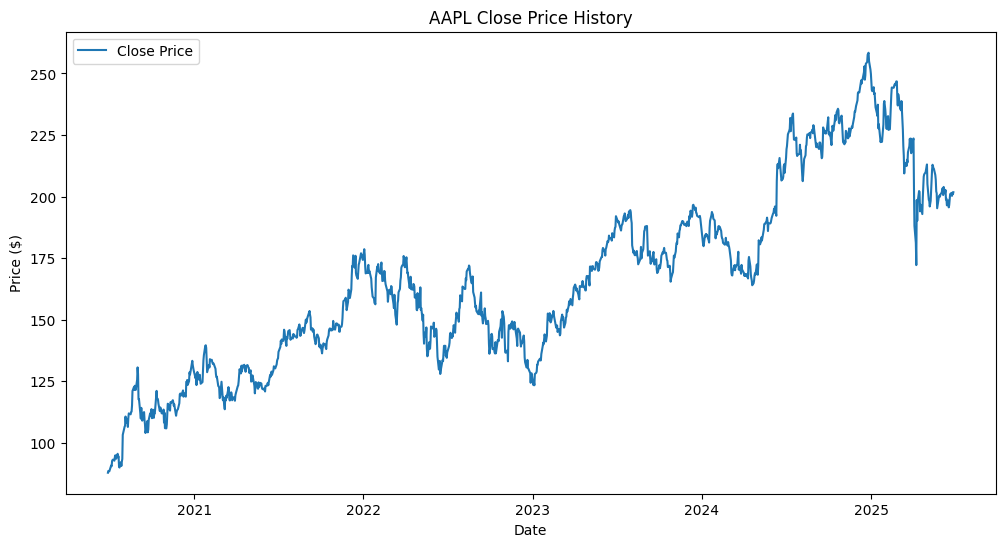

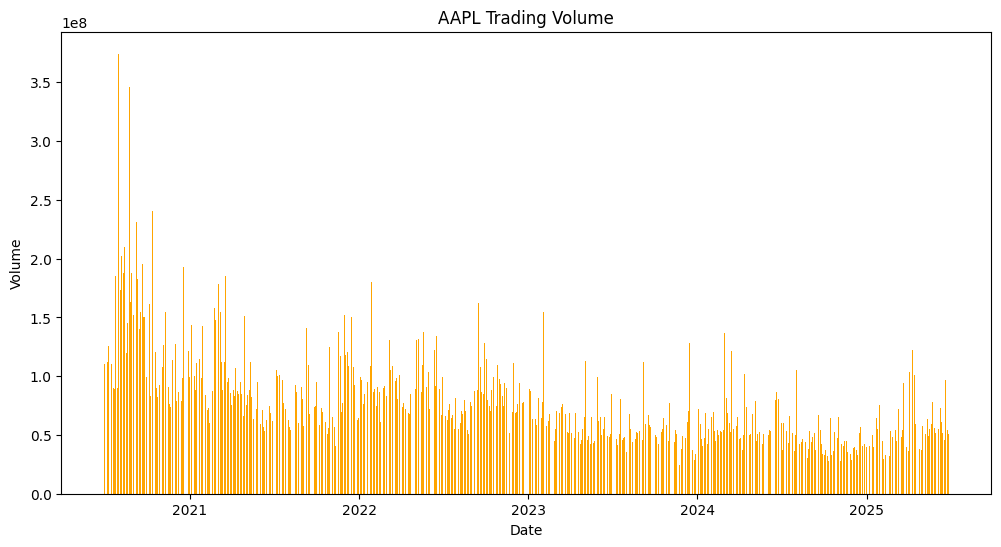

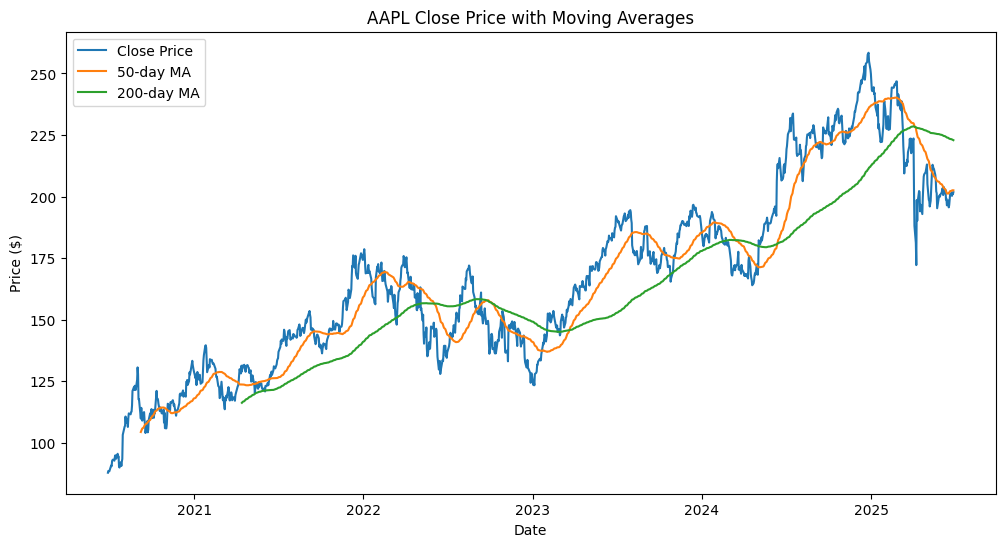

In [2]:
# This line clones your GitHub repo into the Colab environment (only needed once per session)
!git clone https://github.com/kit-crowley/stock-forecasting.git

# Add the 'src' folder inside the cloned repo to Python's import path
import sys
sys.path.append('/content/stock-forecasting/src')

# Now you can import your data_loader module
import data_loader

import matplotlib.pyplot as plt
import pandas as pd

# Fetch stock data
ticker = 'AAPL'
df = data_loader.fetch_stock_data(ticker)

# Show info & head
print(f"Data for {ticker}")
print(df.info())
print(df.head())

# Plot closing price over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title(f"{ticker} Close Price History")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Plot volume
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'], label='Volume', color='orange')
plt.title(f"{ticker} Trading Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Calculate and plot moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA50'], label='50-day MA')
plt.plot(df.index, df['MA200'], label='200-day MA')
plt.title(f"{ticker} Close Price with Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()